<a href="https://colab.research.google.com/github/swetha260/AI-impact-on-job-market-2024-2030-/blob/main/AI_Impact_on_Job_Market_(2024%E2%80%932030).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
# =============================================================================
# Project: AI Impact on the Job Market (2024-2030)
# Author: Swetha
# Description: Exploratory Data Analysis (EDA) to identify job-roles, skills,
#              and trends in the job market as AI impact grows. Freshers’ focus.
# =============================================================================

In [146]:
!pip install pandas numpy matplotlib seaborn plotly --quiet

In [147]:
# 1. Import libraries
import pandas as pd         # working with tables (DataFrame)
import numpy as np          # numeric ops, arrays
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns            # nicer statistical plots

In [148]:
# Set overall style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 7)

# Define a dynamic color palette
my_palette = sns.color_palette(["#2E86C1", "#28B463", "#F39C12", "#C0392B", "#8E44AD"])


In [149]:
# 2. Load the dataset
df=pd.read_csv('ai_job_trends_dataset.csv')
df.head()

,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


In [150]:
df = df.drop_duplicates()

In [151]:
df.info()                        #Shows column names, data types, and missing counts — good for a structural overview.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job Title                    30000 non-null  object 
 1   Industry                     30000 non-null  object 
 2   Job Status                   30000 non-null  object 
 3   AI Impact Level              30000 non-null  object 
 4   Median Salary (USD)          30000 non-null  float64
 5   Required Education           30000 non-null  object 
 6   Experience Required (Years)  30000 non-null  int64  
 7   Job Openings (2024)          30000 non-null  int64  
 8   Projected Openings (2030)    30000 non-null  int64  
 9   Remote Work Ratio (%)        30000 non-null  float64
 10  Automation Risk (%)          30000 non-null  float64
 11  Location                     30000 non-null  object 
 12  Gender Diversity (%)         30000 non-null  float64
dtypes: float64(4), i

In [152]:
df.describe()                   #statistical summary

,Median Salary (USD),Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Gender Diversity (%)
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,90119.965639,10.051433,5039.640833,5074.218100,49.836431,50.154229,49.979660
std,34412.013953,6.060678,2861.009654,2866.550722,28.966688,28.754889,17.274665
min,30001.860000,0.000000,100.000000,100.000000,0.000000,0.000000,20.000000
25%,60500.702500,5.000000,2570.000000,2586.750000,24.570000,25.400000,35.070000
50%,90274.115000,10.000000,5034.000000,5106.500000,49.570000,50.020000,49.885000
75%,119454.710000,15.000000,7527.000000,7573.000000,75.100000,75.030000,64.910000
max,149998.500000,20.000000,10000.000000,10000.000000,100.000000,99.990000,80.000000


In [153]:
# 3. Basic overview
print("Dataset shape:", df.shape)
print("\nColumns and types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Dataset shape: (30000, 13)

Columns and types:
 Job Title                       object
Industry                        object
Job Status                      object
AI Impact Level                 object
Median Salary (USD)            float64
Required Education              object
Experience Required (Years)      int64
Job Openings (2024)              int64
Projected Openings (2030)        int64
Remote Work Ratio (%)          float64
Automation Risk (%)            float64
Location                        object
Gender Diversity (%)           float64
dtype: object

Missing values per column:
 Job Title                      0
Industry                       0
Job Status                     0
AI Impact Level                0
Median Salary (USD)            0
Required Education             0
Experience Required (Years)    0
Job Openings (2024)            0
Projected Openings (2030)      0
Remote Work Ratio (%)          0
Automation Risk (%)            0
Location                       0
Gender

In [154]:
from scipy import stats
np.abs(stats.zscore(df.select_dtypes(include=np.number))) > 3     #checks anomalies


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [155]:
from scipy import stats

# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Compute z-scores
z_scores = np.abs(stats.zscore(df[numeric_cols]))

# Boolean mask of outliers (True if |z| > 3)
outliers_mask = (z_scores > 3)

# Example: rows with any outlier
outlier_rows = df[(outliers_mask).any(axis=1)]
print(f"Number of rows with outliers: {outlier_rows.shape[0]}")
outlier_rows.head()


Number of rows with outliers: 0


,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)


In [156]:
# 4. Clean / Preprocess
# Example: standardise column names
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

In [157]:
text_cols = df.select_dtypes(include='object').columns                     # Select all object/string columns

for col in text_cols:
    print(f"\nColumn: {col}")

    print(df[col].str.strip().str.title().value_counts().head(10))                  # strip spaces, each word start with a capital letter , count unique values



Column: job_title
job_title
Surveyor, Insurance                     75
Counselling Psychologist                70
Charity Officer                         68
Surveyor, Land/Geomatics                67
Hydrogeologist                          66
Insurance Claims Handler                65
Engineer, Production                    64
Tax Inspector                           64
Television Production Assistant         63
International Aid/Development Worker    63
Name: count, dtype: int64

Column: industry
industry
Entertainment     3895
Manufacturing     3855
Healthcare        3771
Finance           3721
Education         3714
Retail            3702
It                3681
Transportation    3661
Name: count, dtype: int64

Column: job_status
job_status
Increasing    15136
Decreasing    14864
Name: count, dtype: int64

Column: ai_impact_level
ai_impact_level
Moderate    10042
High        10005
Low          9953
Name: count, dtype: int64

Column: required_education
required_education
Bachelor’S De

In [158]:
# Example: if there is a ‘year’ or projection column, convert to int
if "year" in df.columns:
    df["year"] = df["year"].astype(int)

/tmp/ipython-input-3404311365.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_jobs.index, x=top_jobs.values, palette="viridis")


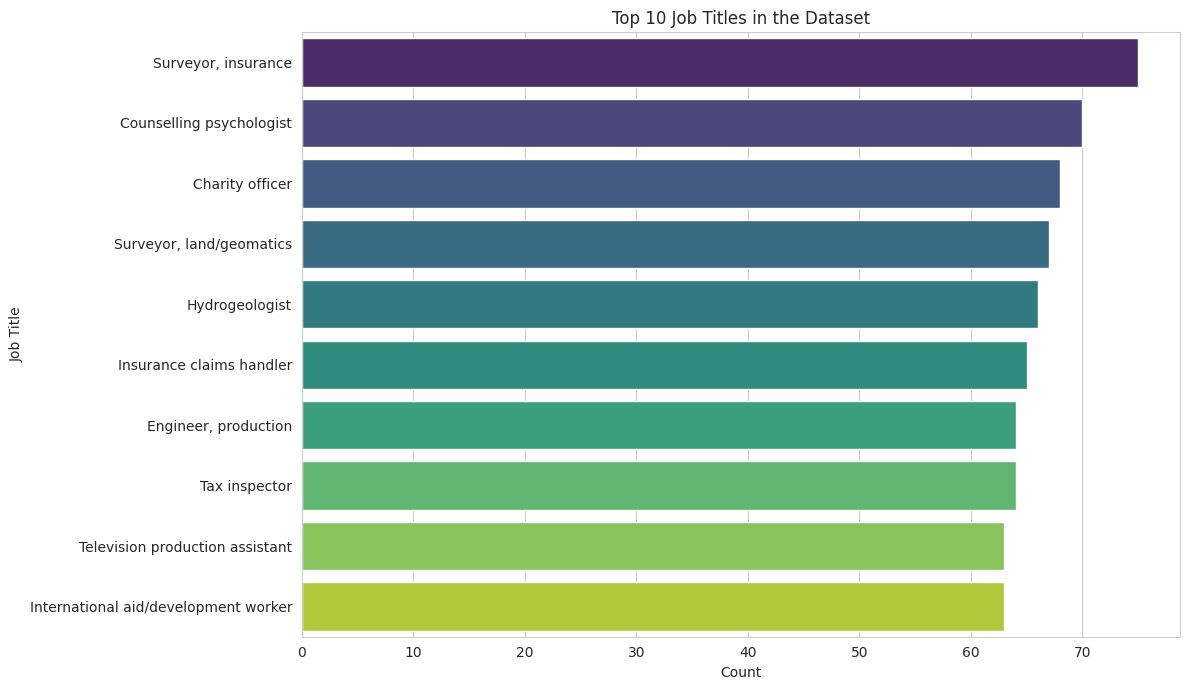

In [159]:
# 5. Univariate Analysis
# Top job roles by count
if "job_title" in df.columns:
    top_jobs = df["job_title"].value_counts().head(10)
    plt.figure()
    sns.barplot(y=top_jobs.index, x=top_jobs.values, palette="viridis")
    plt.title("Top 10 Job Titles in the Dataset")
    plt.xlabel("Count")
    plt.ylabel("Job Title")
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-2187187575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


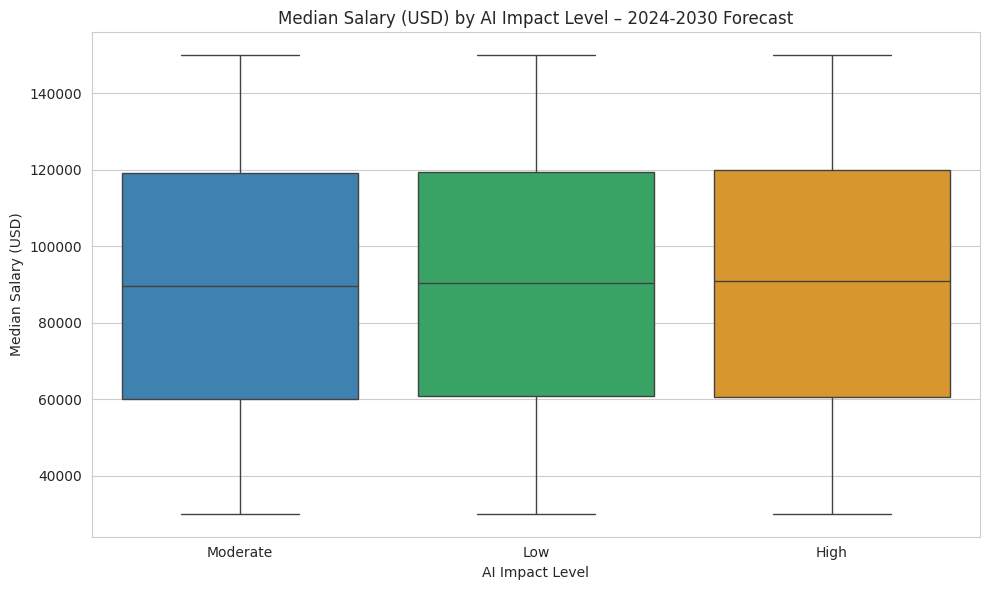

In [160]:
# Boxplot: median salary by AI impact level
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="ai_impact_level",
    y="median_salary_(usd)",
    palette=my_palette[:3]  # green, orange, red
)
plt.title("Median Salary (USD) by AI Impact Level – 2024-2030 Forecast")
plt.xlabel("AI Impact Level")
plt.ylabel("Median Salary (USD)")
plt.tight_layout()
plt.show()

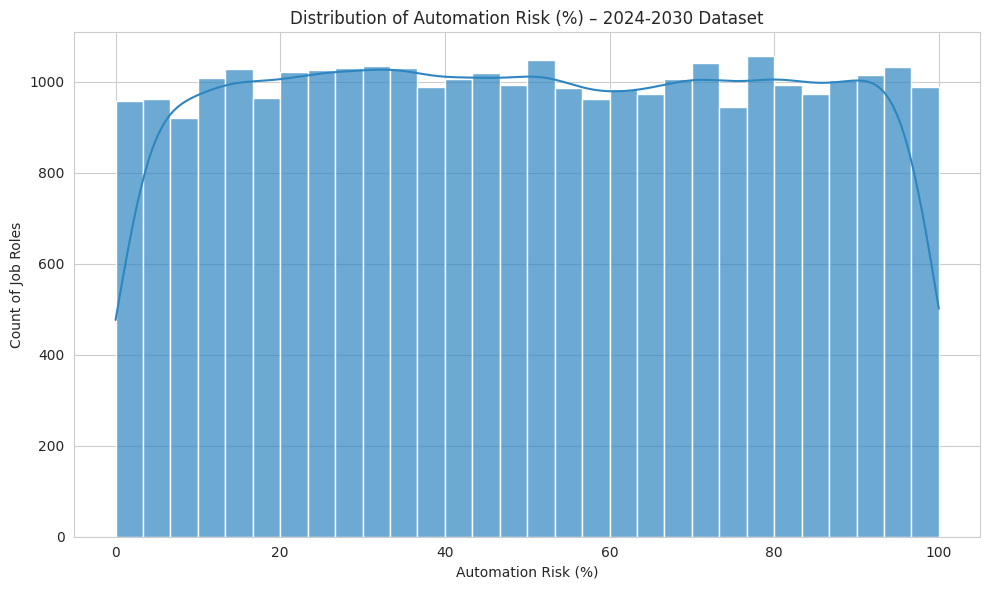

In [161]:
#Distribution of Automation Risk (%)
plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x="automation_risk_(%)",
    bins=30,
    kde=True,
    color="#2E86C1",    # your chosen colour
    alpha=0.7
)
plt.title("Distribution of Automation Risk (%) – 2024‑2030 Dataset")
plt.xlabel("Automation Risk (%)")
plt.ylabel("Count of Job Roles")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1191805070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


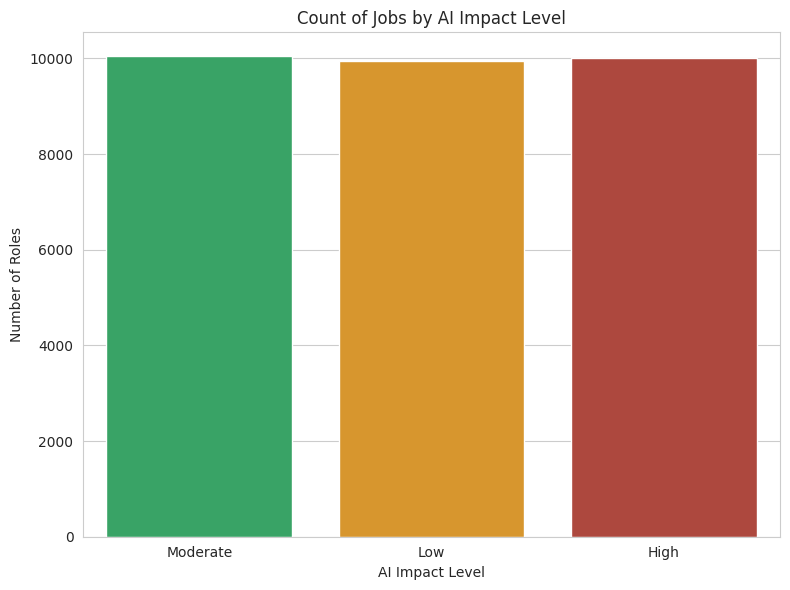

In [162]:
#Count of Jobs per AI Impact Level
plt.figure(figsize=(8,6))
sns.countplot(
    data=df,
    x="ai_impact_level",
    palette=["#28B463", "#F39C12", "#C0392B"]
)
plt.title("Count of Jobs by AI Impact Level")
plt.xlabel("AI Impact Level")
plt.ylabel("Number of Roles")
plt.tight_layout()
plt.show()

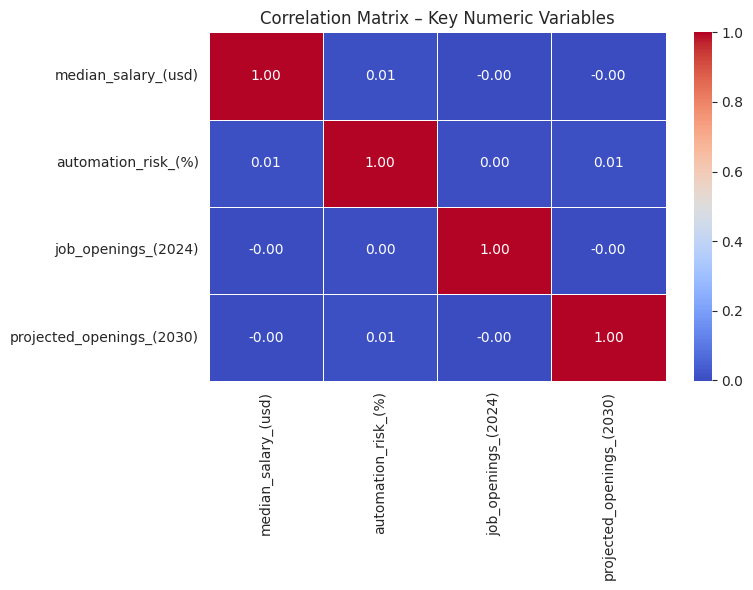

In [163]:
#Correlation Matrix Between Numeric Columns

# Select numeric columns
num_cols = ["median_salary_(usd)", "automation_risk_(%)", "job_openings_(2024)", "projected_openings_(2030)"]
corr_mat = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_mat,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Matrix – Key Numeric Variables")
plt.tight_layout()
plt.show()

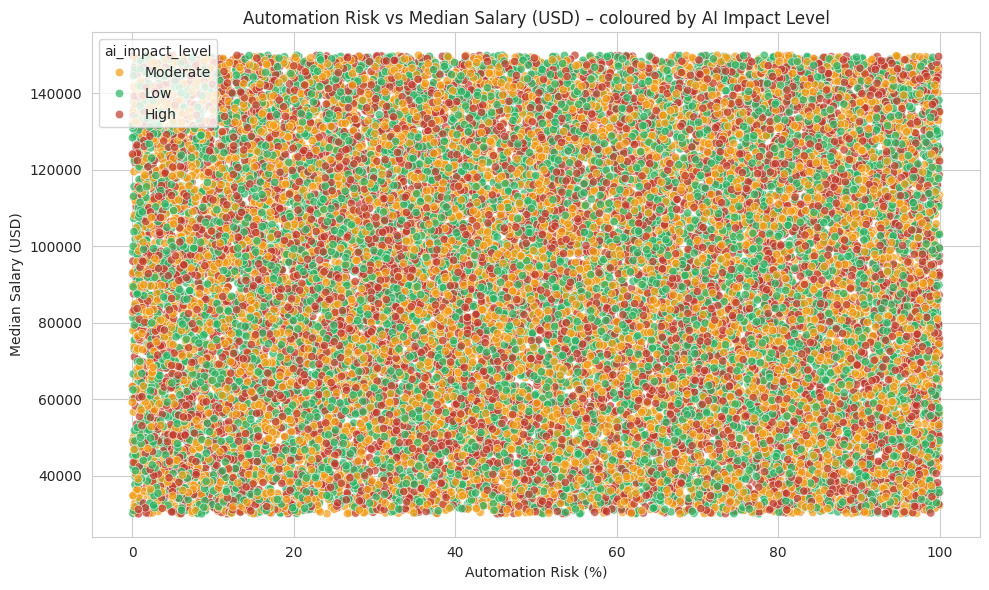

In [164]:
#6. Bivariate Analysis

#Scatterplot: Automation Risk (%) vs Median Salary with hue = AI Impact Level
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="automation_risk_(%)",
    y="median_salary_(usd)",
    hue="ai_impact_level",
    palette={"Low":"#28B463","Moderate":"#F39C12","High":"#C0392B"},
    alpha=0.7
)
plt.title("Automation Risk vs Median Salary (USD) – coloured by AI Impact Level")
plt.xlabel("Automation Risk (%)")
plt.ylabel("Median Salary (USD)")
plt.tight_layout()
plt.show()


<Figure size 1200x1000 with 0 Axes>

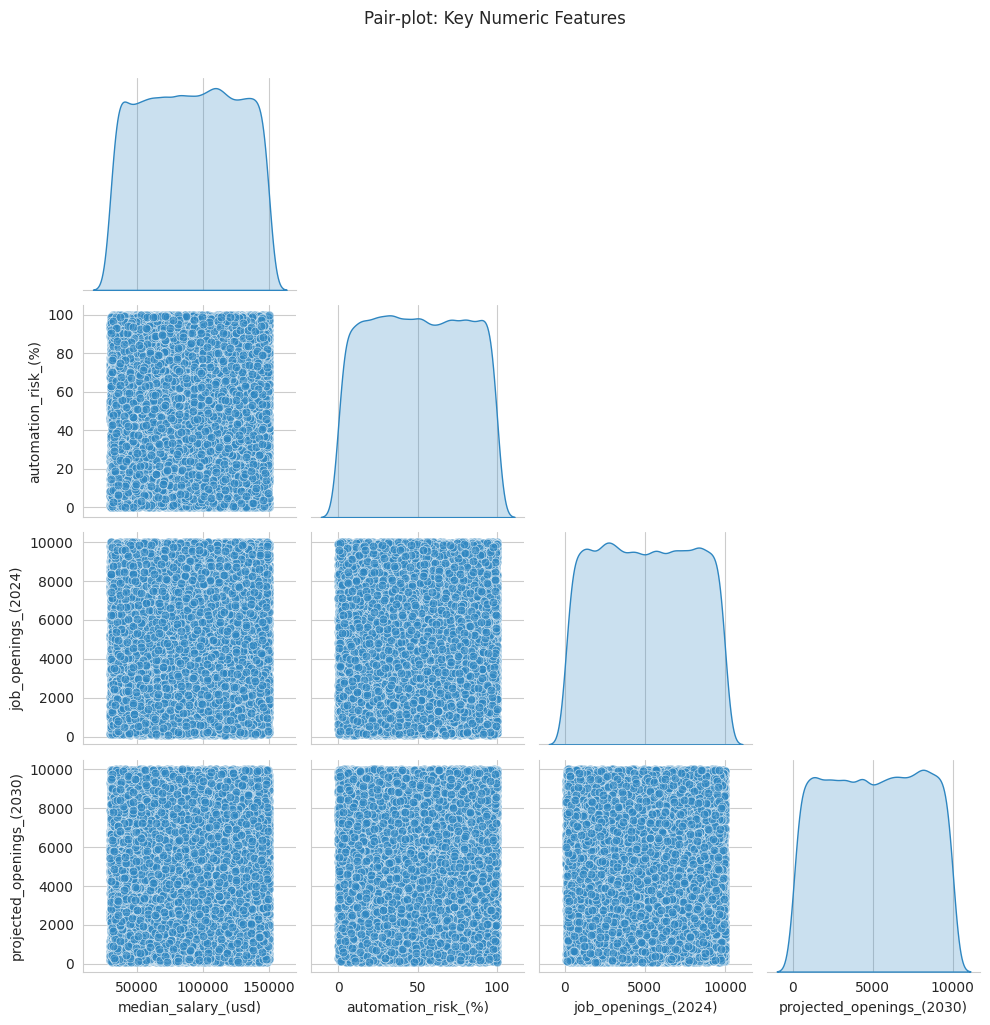

In [165]:
# Pair‑plot for numeric features to explore pairwise relationships
import seaborn as sns
plt.figure(figsize=(12, 10))  # adjust size as needed

# Select numeric columns
num_cols = ["median_salary_(usd)", "automation_risk_(%)", "job_openings_(2024)", "projected_openings_(2030)"]

# Use pairplot from seaborn
sns.pairplot(
    df[num_cols],
    diag_kind="kde",    # kernel density on diagonal
    plot_kws={'alpha':0.6, 's':40},    # transparency + marker size
    corner=True         # only lower triangle (optional)
)
plt.suptitle("Pair‑plot: Key Numeric Features", y=1.02)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2388038793.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


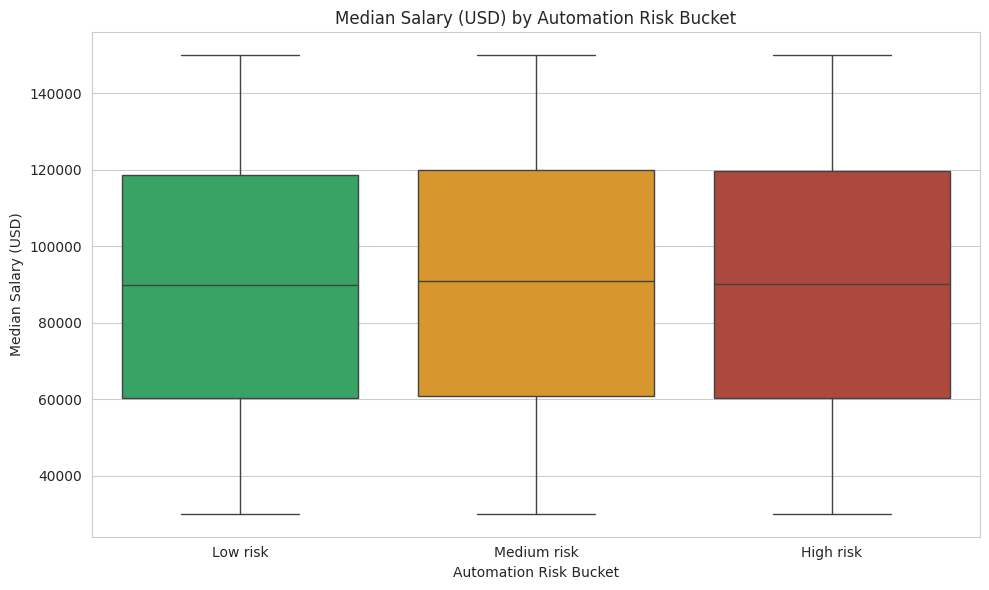

In [166]:
# Box‑plot: Median Salary by Automation Risk Category
# First create risk category buckets
df["automation_risk_bucket"] = pd.cut(
    df["automation_risk_(%)"],
    bins=[-1, 33, 66, 100],
    labels=["Low risk", "Medium risk", "High risk"]
)

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="automation_risk_bucket",
    y="median_salary_(usd)",
    palette=["#28B463","#F39C12","#C0392B"]
)
plt.title("Median Salary (USD) by Automation Risk Bucket")
plt.xlabel("Automation Risk Bucket")
plt.ylabel("Median Salary (USD)")
plt.tight_layout()
plt.show()

In [167]:
# Create growth change & percent using correct column names
df["growth_change"] = df["projected_openings_(2030)"] - df["job_openings_(2024)"]
df["growth_percent"] = df["growth_change"] / df["job_openings_(2024)"] * 100
df[["growth_change", "growth_percent"]].head()


,growth_change,growth_percent
0,4827,318.613861
1,4962,399.195495
2,-2184,-65.428400
3,-3113,-43.398857
4,1452,24.427995


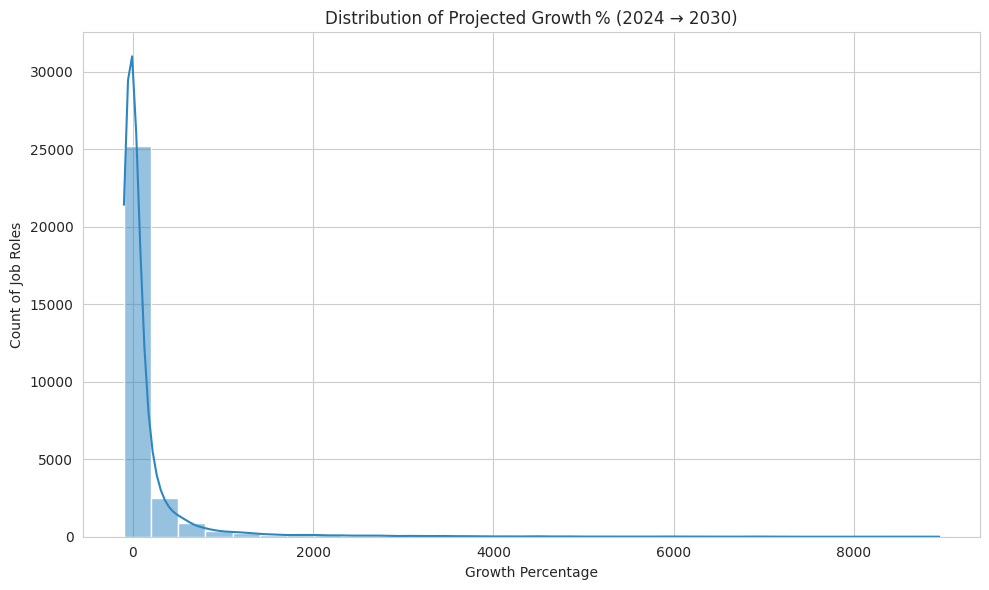

In [168]:
plt.figure(figsize=(10,6))
sns.histplot(df["growth_percent"], bins=30, kde=True, color="#2E86C1")
plt.title("Distribution of Projected Growth % (2024 → 2030)")
plt.xlabel("Growth Percentage")
plt.ylabel("Count of Job Roles")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2871441731.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


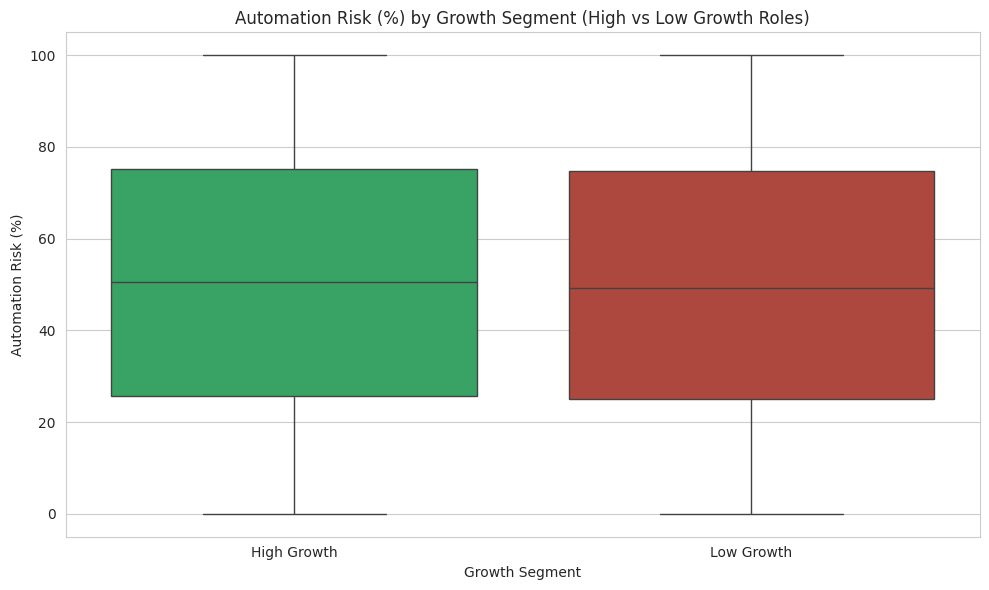

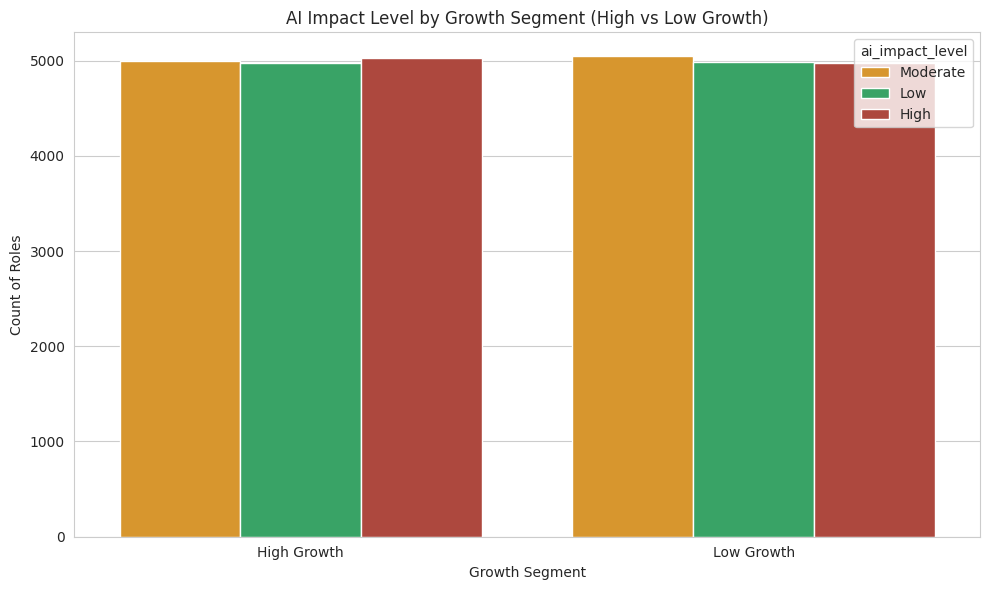

In [169]:
# A. Segment jobs into high-growth vs low-growth based on projected openings
# Using your column names: job_openings_(2024), projected_openings_(2030)
df["growth_change"] = df["projected_openings_(2030)"] - df["job_openings_(2024)"]
df["growth_pct"] = (df["growth_change"] / df["job_openings_(2024)"]) * 100

# Create a new category: high growth if growth_pct above median, else low growth
median_growth = df["growth_pct"].median()
df["growth_segment"] = np.where(df["growth_pct"] >= median_growth, "High Growth", "Low Growth")

# Compare automation risk across growth segments
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="growth_segment",
    y="automation_risk_(%)",
    palette=["#28B463", "#C0392B"]
)
plt.title("Automation Risk (%) by Growth Segment (High vs Low Growth Roles)")
plt.xlabel("Growth Segment")
plt.ylabel("Automation Risk (%)")
plt.tight_layout()
plt.show()

# Also compare AI Impact Level across growth segments
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x="growth_segment",
    hue="ai_impact_level",
    palette={"Low":"#28B463","Moderate":"#F39C12","High":"#C0392B"}
)
plt.title("AI Impact Level by Growth Segment (High vs Low Growth)")
plt.xlabel("Growth Segment")
plt.ylabel("Count of Roles")
plt.tight_layout()
plt.show()

In [170]:
# 8. Key Insights & Summary
print("🔍 KEY INSIGHTS:")
print(f"- The top 10 job roles by count are: {list(top_jobs.index[:10])}")

# If you have a skills list
if "skills" in df.columns:
    print(f"- The most frequent top skills are: {list(all_skills.index[:5])}")

# If you created a risk category
if "risk_category" in df.columns:
    high_risk_count = df[df["risk_category"] == "High risk"].shape[0]
    total_roles = df.shape[0]
    percent_high_risk = (high_risk_count / total_roles) * 100
    print(f"- Number of roles flagged as ‘High risk’ due to AI impact: {high_risk_count} (~{percent_high_risk:.1f}% of dataset)")

# Example extra insight
if "growth_percent" in df.columns:
    top_growth_roles = df.sort_values("growth_percent", ascending=False)["job_title"].head(3).tolist()
    print(f"- Top 3 roles projected to grow most (2024→2030): {top_growth_roles}")

print("\n✅ RECOMMENDATIONS FOR FRESHERS:")
print("1. Focus on roles with *Low to Moderate* AI impact and strong projected growth.")
print("2. Prioritise skill‑sets that appear across high‑growth and low‑risk roles.")
print("3. Consider industries where job openings are projected to increase and where required education/experience aligns with a fresher profile.")
print("\n⚠️ LIMITATIONS:")
print("- The dataset uses projections up to 2030 and may not account for unforeseen technological shifts.")
print("- Some columns (e.g., skills) may not fully capture emerging niche skills or regional differences.")


🔍 KEY INSIGHTS:
- The top 10 job roles by count are: ['Surveyor, insurance', 'Counselling psychologist', 'Charity officer', 'Surveyor, land/geomatics', 'Hydrogeologist', 'Insurance claims handler', 'Engineer, production', 'Tax inspector', 'Television production assistant', 'International aid/development worker']
- Top 3 roles projected to grow most (2024→2030): ['Sports coach', 'Learning disability nurse', 'Jewellery designer']

✅ RECOMMENDATIONS FOR FRESHERS:
1. Focus on roles with *Low to Moderate* AI impact and strong projected growth.
2. Prioritise skill‑sets that appear across high‑growth and low‑risk roles.
3. Consider industries where job openings are projected to increase and where required education/experience aligns with a fresher profile.

⚠️ LIMITATIONS:
- The dataset uses projections up to 2030 and may not account for unforeseen technological shifts.
- Some columns (e.g., skills) may not fully capture emerging niche skills or regional differences.


In [174]:
# 9. Recommendations for Freshers
print("\n✅ RECOMMENDATIONS FOR FRESHERS:")
if "all_skills" in locals():
    print(f"1. Focus on acquiring high‑value skills such as: {list(all_skills.index[:5])}")
else:
    print("1. Focus on acquiring high‑value skills (please check skills‑analysis section).")

print("2. Target job titles that appear frequently in the dataset and fall under *Low to Moderate* AI‑impact levels (to boost job‑security).")

if "risk_category" in df.columns:
    safe_roles = df[df["risk_category"] == "Low risk"]["job_title"].value_counts().head(5)
    print(f"3. Potential lower‑risk job titles include: {list(safe_roles.index)}")

print("4. Consider roles with strong projected growth (2024 → 2030) and moderate automation risk — those are strategic entry points.")
print("5. Prioritise building a portfolio project that demonstrates data‑analysis skills (e.g., this project) — practical proof is key.")

print("\n🔍 WHY THESE MATTER:")
print("‑ The job‑market is shifting, with freshers needing both foundational tech skills (e.g., Python, SQL) and awareness of AI‑impact trends.")
print("‑ Employers value candidates who not only analyse data but can translate it into actionable insights — which your project demonstrates.")



✅ RECOMMENDATIONS FOR FRESHERS:
1. Focus on acquiring high‑value skills (please check skills‑analysis section).
2. Target job titles that appear frequently in the dataset and fall under *Low to Moderate* AI‑impact levels (to boost job‑security).
4. Consider roles with strong projected growth (2024 → 2030) and moderate automation risk — those are strategic entry points.
5. Prioritise building a portfolio project that demonstrates data‑analysis skills (e.g., this project) — practical proof is key.

🔍 WHY THESE MATTER:
‑ The job‑market is shifting, with freshers needing both foundational tech skills (e.g., Python, SQL) and awareness of AI‑impact trends.
‑ Employers value candidates who not only analyse data but can translate it into actionable insights — which your project demonstrates.
